**Задание 1**

Написать функцию для скрейпинга веб-страниц

In [42]:
'''
Импортируйте библиотеки для скрейпинга веб-страниц
'''
!pip install requests beautifulsoup4

import requests
from bs4 import BeautifulSoup

In [43]:
'''
Допишите функцию для скрейпинга
'''

def scrape_text_from_url(url, tag, class_=None):
    response = requests.get(url) # выполните HTML-запрос
    if response.status_code == 200:
      soup = BeautifulSoup(response.text, 'html.parser') # если запрос успешный (возвращается значение 200)
      if class_:
        paragraphs = soup.find_all(tag, class_)# ищем теги и классы на основании аргументов функции; по умолчанию ищем только тег
      else:
        paragraphs = soup.find_all(tag)
      text = '' # создаем переменную text строкового типа, куда мы запишем все найденные совпадения ###
      for p in paragraphs:# начинаем перебор элементов переменной paragraphs
        text += p.get_text() # извлекаем текстовые данные
      return text
    else:# иначе
        print(f"Failed to retrieve page. Status code: {response.status_code}")
        return None #выводим статус-код и сообщение об ошибке ###


In [44]:
'''
Проверяем функцию для скрейпинга: пример 1
'''

scrape_text_from_url('https://en.wikipedia.org/wiki/Chomsky_hierarchy', 'p')[:100]

'The Chomsky hierarchy in the fields of formal language theory, computer science, and linguistics, is'

In [45]:
'''
Проверяем функцию для скрейпинга: пример 2
'''

scrape_text_from_url('https://www.rottentomatoes.com/m/civil_war_2024/reviews', 'p', 'review-text')[:100]

'Garland seems poised to be make political points, to show how our current political dysfunction coul'

**Задание 2**

Написать функцию для сентимент-анализа

In [46]:
'''
Импортируем библиотеки re и SpaCy для обработки текста
'''

import re
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
'''
Загружаем списки слов с положительным и отрицательным значением, и список стоп-слов
'''

!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt

'''
Читаем файлы
'''

with open('neg.txt', 'r') as f:
    neg = f.read()

with open('pos.txt', 'r') as f:
    pos = f.read()

with open('stopwords.txt', 'r') as f:
    stopwords = f.read()

'''
Создаем списки слов, разделив строку по знаку \n, и делим список стоп-слов
'''

pos_list = pos.split('\n')
neg_list = neg.split('\n')
stopwords = stopwords.split()

'''
Функция удаления стоп-слов
'''

def remove_stopwords(text, stopwords):
    words = text.split() # разбейте текст из переменной text на слова
    filtered_words = [] # создайте пустой список:
    for word in words:
      if word.lower() not in stopwords: # если слово, приведенное к нижнему регистру присутствует в списке стоп-слов,
        filtered_words.append(word) # добавьте его в список filtered_words
    cleaned_text = ' '.join(filtered_words) # объедините слова из списка filtered_words в строку с join
    return cleaned_text

'''
Функция для сентимент-анализа
'''

def analyze_sentiment(text, positive_words, negative_words):
    ### По желанию: удалить стоп-слова и знаки препинания; использовать NLP-библиотеки для токенизации ###
    cleantext = re.sub('\W+', ' ', text)
    cleantext = remove_stopwords(cleantext, stopwords)
    cleantext.lower().split('\n')
    cleantext = nlp(cleantext)
    words = [token.lemma_ for token in cleantext] # запишите результат в переменную words

    # Считаем скор тональности: количество пересечений между списками words и положительными / отрицательными словами
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    if positive_count > negative_count:
      return 'positive' # если положительный скор больше отрицательного, возвращаем строчку 'positive'
    elif negative_count > positive_count:
      return 'negative' # если отрицательный скор больше положительного, возвращаем строчку 'negative'
    else:
      return 'neutral' # Иначе возвращаем строчку 'neutral'


--2024-11-23 13:42:45--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.2’

neg.txt.2           100%[===================>]  43.71K  --.-KB/s    in 0.01s   

2024-11-23 13:42:45 (3.79 MB/s) - ‘neg.txt.2’ saved [44759/44759]

--2024-11-23 13:42:45--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savi

In [47]:
'''
Проверяем функцию для анализа тональности: пример 1
'''

data = 'This sample text is awesome!'
analyze_sentiment(text=data, positive_words=pos_list, negative_words=neg_list)

'positive'

In [48]:
'''
Проверяем функцию для анализа тональности: пример 2
'''
data = 'I hate this sample text.'
analyze_sentiment(data, pos_list, neg_list)

'negative'

In [49]:
'''
Проверяем функцию для анализа тональности: пример 3
'''
data = 'We love and hate this sample text at the same time!'
analyze_sentiment(data, pos_list, neg_list)

'neutral'

**Задание 3**

Написать функцию для вывода сентимент-скоров

In [50]:
'''
Допишите функцию для вывода скоров по заданному URL
'''

import re


def analyze(positive_words, negative_words, url, tag, class_=None):
  scraped_text = scrape_text_from_url(url, tag, class_) # примените функцию scrape_text_from_url
  sentences = scraped_text.split('.') # сегментируйте текст по предложениям (через точку)
  sentiments = [] # создаем пустой список, куда запишем скоры ###
  for sentence in sentences:# начинаем перебор по предложениям ###
    score = analyze_sentiment(sentence, positive_words, negative_words) # получаем скор для данного предложения с помощью функции analyze_sentiment
    sentiments.append(score)# добавляем скор в созданный список ###
  return sentiments # возвращаем список скоров ###

In [51]:
'''
Тест 1
'''

analyze(url='https://en.wikipedia.org/wiki/Chomsky_hierarchy', tag='p', positive_words=pos, negative_words=neg)[:10]

['neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative']

In [52]:
'''
Тест 2
'''

analyze(url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', positive_words=pos, negative_words=neg)[:10]


['negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative']

**Задача 4**

Визуализировать результаты анализа

In [53]:
'''
Создаем частотный словарь с помощью библиотеки Counter.
Можно выбрать другие веб-страницы для анализа!
'''

from collections import Counter

sample1 = Counter(analyze(url='https://matplotlib.org/stable/tutorials/pyplot.html', tag='a', class_='reference internal', positive_words=pos, negative_words=neg))
sample2 = Counter(analyze(url='https://www.w3schools.com/html/html_classes.asp', tag='p', positive_words=pos, negative_words=neg))

sample2

Counter({'neutral': 11, 'positive': 5, 'negative': 18})

In [54]:
sample3 = Counter(analyze(url='https://www.rottentomatoes.com/m/focus_2015', tag='p', positive_words=pos, negative_words=neg))
sample4 = Counter(analyze(url='https://www.w3schools.com/cpp/cpp_intro.asp', tag='a', positive_words=pos, negative_words=neg))
sample4

Counter({'positive': 2, 'neutral': 16, 'negative': 8})

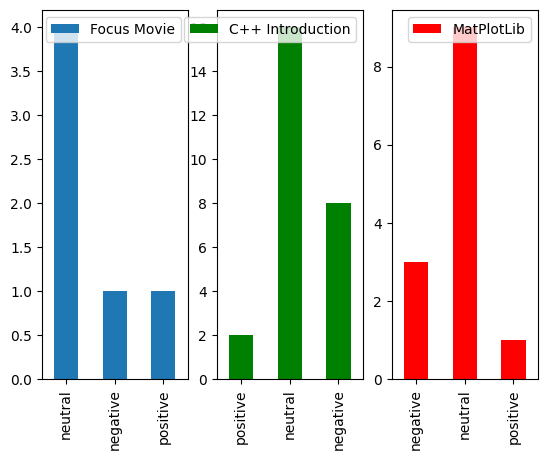

In [55]:
'''
Создаем визуализацию: попробуйте использование новые данные (данные других url)
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame.from_dict(sample3, orient='index', columns=['Focus Movie'])
df2 = pd.DataFrame.from_dict(sample4, orient='index', columns=['C++ Introduction'])
df3 = pd.DataFrame.from_dict(sample1, orient='index', columns=['MatPlotLib'])

fig, ax = plt.subplots(ncols=3)

ax[0] = df1.plot.bar(ax=ax[0])
ax[1] = df2.plot.bar(ax=ax[1], color='green')
ax[2] = df3.plot.bar(ax=ax[2], color='red')

**Задача 5**

Соберите все 3 функции в одной ячейке ниже. Проанализируйте получшившийся код. Сделайте ревью!

Попробуйте сделать рефакторинг: найти повторы в коде, избыточные конструкции и заменить их на более простые и питоничные решения. Рефакторинг ускоряет выполнение кода и упрощает его чтение.

Улучшите код, добавьте строчки для вывода промежуточных и итоговых результатов; запустите ячейку.

Это творческое задание, правильных решений нет - главное, чтобы код работал! :)

Не забудьте закомментировать свои изменения.

In [56]:
# Подготовка всех данных
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/stopwords.txt

import requests
from bs4 import BeautifulSoup
import re
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('neg.txt', 'r') as f:
    neg = f.read()

with open('pos.txt', 'r') as f:
    pos = f.read()

with open('stopwords.txt', 'r') as f:
    stopwords = f.read()

pos = pos.split('\n')
neg = neg.split('\n')
sw = stopwords.split()


--2024-11-23 13:42:57--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/neg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44759 (44K) [text/plain]
Saving to: ‘neg.txt.3’

neg.txt.3           100%[===================>]  43.71K  --.-KB/s    in 0.01s   

2024-11-23 13:42:57 (3.53 MB/s) - ‘neg.txt.3’ saved [44759/44759]

--2024-11-23 13:42:58--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/data/pos.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19093 (19K) [text/plain]
Savi

## Мои чувства по этому заданию:

*Я очень хотела написать функцию так, чтобы не использовать функцию внутри функции. Я соображала очень долго (неделю), но сдалась и просто вызывала ранее написанные функции, только так у меня все сработало.*

In [90]:
def THE_function(positive_words, negative_words, url, tag, class_=None, stopwords=None):
  '''
  В этой функции мы должны сделать следующее:
  1)скрейпинг веб-страницы
  2)обработку текста (очищение от пунктуации и стоп слов)
  3)сделать сентимент анализ и вывод скоров
  4)визуализировать с помощью частотного словаря и графиков
  '''
  text = scrape_text_from_url(url, tag, class_=None)
  print(f'Результат скрейпинга: \n{text[:200]} \n--------------------------------------------------------------------\n')

  sentences = text.split('.')
  sentiments =[]
  for sentence in sentences:
    score = analyze_sentiment(sentence, positive_words, negative_words)
    sentiments.append(score)
  print(f'\nРезультат сентимент-анализа: \n\n{sentiments[:10]} \n--------------------------------------------------------------------\n')

  sample = Counter(sentiments)
  print(f'\nЧастотный словарь: \n\n{sample} \n--------------------------------------------------------------------\n')

  print('\nВизуализация сентимент-скора')
  df1 = pd.DataFrame.from_dict(sample, orient='index', columns=['sentiment analysis'])
  fig, ax = plt.subplots(ncols=1)

  ax = df1.plot.bar(ax=ax, color='green')



Результат скрейпинга: 

                W3Schools offers a wide range of services and products for beginners and professionals,
                
                helping millions of people everyday to learn and master new sk 
--------------------------------------------------------------------


Результат сентимент-анализа: 

['positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'negative'] 
--------------------------------------------------------------------


Частотный словарь: 

Counter({'neutral': 24, 'positive': 6, 'negative': 4}) 
--------------------------------------------------------------------


Визуализация сентимент-скора


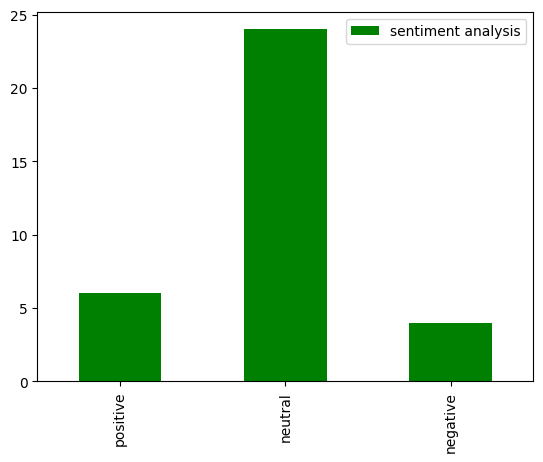

In [91]:
# Проверка 1
THE_function(pos, neg, url='https://www.w3schools.com/html/html_classes.asp', tag='p', stopwords=sw)

Результат скрейпинга: 
Login Now!Sign up Now!
Submission
 


6,249


Part of a series on
TikTok.
[View Related Entries]
Top 5 Lists, also known as Top Cinco Lists, is a video meme trend in which a Spanish text-to-speech acc 
--------------------------------------------------------------------


Результат сентимент-анализа: 

['neutral', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral'] 
--------------------------------------------------------------------


Частотный словарь: 

Counter({'neutral': 27, 'positive': 15}) 
--------------------------------------------------------------------


Визуализация сентимент-скора


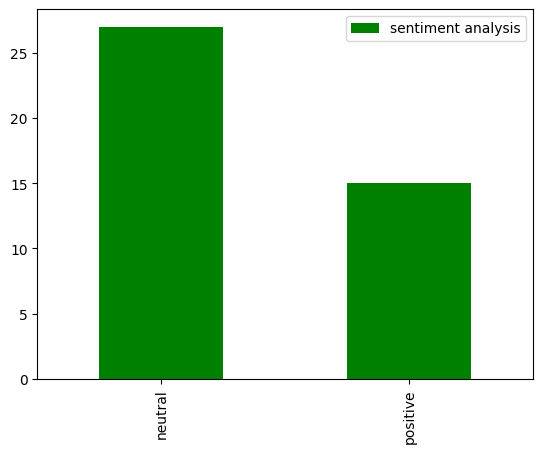

In [92]:
# Проверка 2
THE_function(pos, neg, url='https://knowyourmeme.com/memes/top-5-lists', tag='p', stopwords=sw)

Результат скрейпинга: 
Movies in theatersMovies at HomeMoreCertified fresh picks
              New TV Tonight
            
              Most Popular TV on RT
            More
              Certified fresh pick
             
--------------------------------------------------------------------


Результат сентимент-анализа: 

['positive', 'positive', 'negative', 'positive', 'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'positive'] 
--------------------------------------------------------------------


Частотный словарь: 

Counter({'neutral': 18, 'positive': 11, 'negative': 9}) 
--------------------------------------------------------------------


Визуализация сентимент-скора


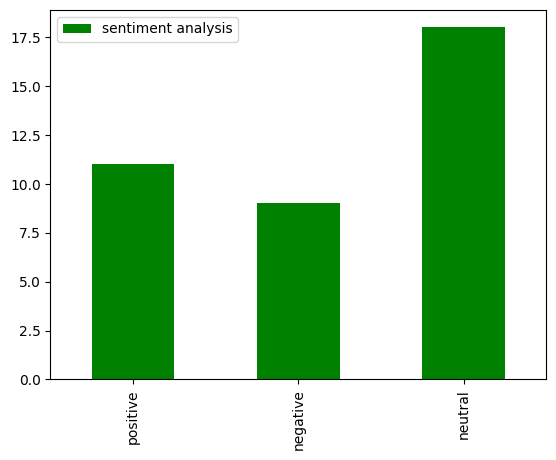

In [93]:
# Проверка 3
THE_function(pos, neg, url='https://www.rottentomatoes.com/m/civil_war_2024/reviews', tag='p', class_='review-text', stopwords=sw)